# _Task-3_ 

# Car Price Prediction with Machine Learning 

## Import the essential libraries 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Load the dataset 

In [3]:
df = pd.read_csv(r"C:\Users\Devansh\OneDrive\Desktop\OIB_DataScience_Internship\OIBSIP_Task_3\car data.csv")

In [4]:
df

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.tail()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [9]:
df.size

2709

In [10]:
df.shape

(301, 9)

In [11]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [12]:
df.ndim

2

In [13]:
df['Selling_Price'].unique()

array([ 3.35,  4.75,  7.25,  2.85,  4.6 ,  9.25,  6.75,  6.5 ,  8.75,
        7.45,  6.85,  7.5 ,  6.1 ,  2.25,  7.75,  3.25,  2.65,  4.9 ,
        4.4 ,  2.5 ,  2.9 ,  3.  ,  4.15,  6.  ,  1.95,  3.1 ,  2.35,
        4.95,  5.5 ,  2.95,  4.65,  0.35,  5.85,  2.55,  1.25,  1.05,
        5.8 , 14.9 , 23.  , 18.  , 16.  ,  2.75,  3.6 ,  4.5 ,  4.1 ,
       19.99,  6.95, 18.75, 23.5 , 33.  , 19.75,  4.35, 14.25,  3.95,
        1.5 ,  5.25, 14.5 , 14.73, 12.5 ,  3.49, 35.  ,  5.9 ,  3.45,
        3.8 , 11.25,  3.51,  4.  , 20.75, 17.  ,  7.05,  9.65,  1.75,
        1.7 ,  1.65,  1.45,  1.35,  1.2 ,  1.15,  1.11,  1.1 ,  1.  ,
        0.95,  0.9 ,  0.75,  0.8 ,  0.78,  0.72,  0.65,  0.6 ,  0.55,
        0.52,  0.51,  0.5 ,  0.48,  0.45,  0.42,  0.4 ,  0.38,  0.31,
        0.3 ,  0.27,  0.25,  0.2 ,  0.18,  0.17,  0.16,  0.15,  0.12,
        0.1 ,  5.75,  5.15,  7.9 ,  4.85, 11.75,  3.15,  6.45,  3.5 ,
        8.25,  5.11,  2.7 ,  6.15, 11.45,  3.9 ,  9.1 ,  4.8 ,  2.  ,
        5.35,  6.25,

In [14]:
df['Selling_Price'].value_counts()

0.45     8
0.60     8
5.25     7
4.50     7
0.20     6
        ..
3.80     1
3.45     1
5.90     1
35.00    1
11.50    1
Name: Selling_Price, Length: 156, dtype: int64

# Data Cleaning 

In [15]:
df.duplicated().sum()

2

In [16]:
df.drop_duplicates(inplace = True)

In [17]:
df.duplicated().sum()

0

In [18]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [19]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

# Data Visualization 

# Pairplot 

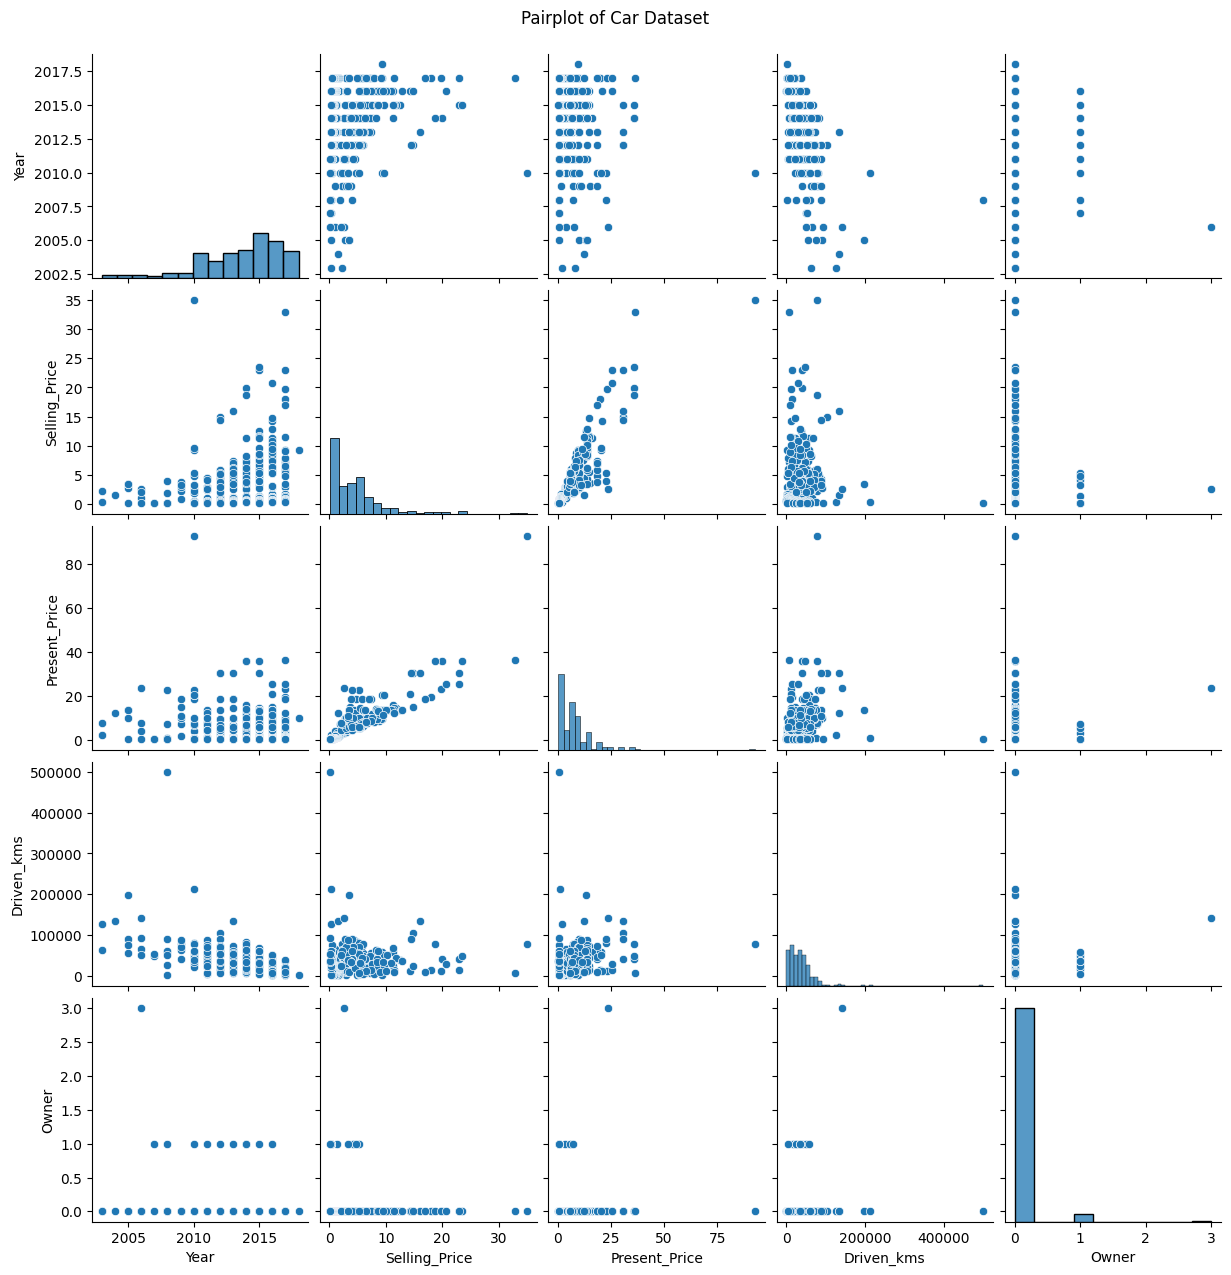

In [20]:
sns.pairplot(df)
plt.suptitle('Pairplot of Car Dataset', y=1.02)
plt.show()

# Correlation Heatmap 

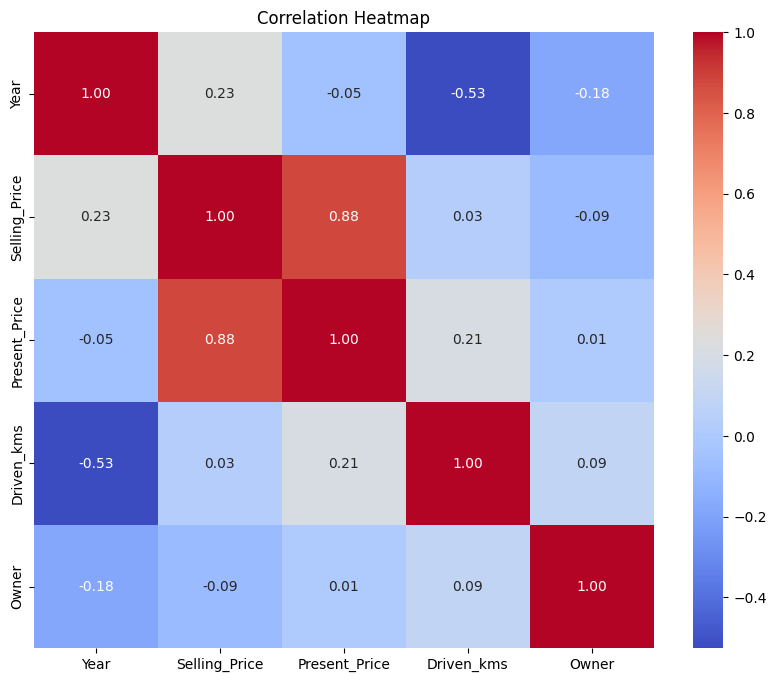

In [21]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

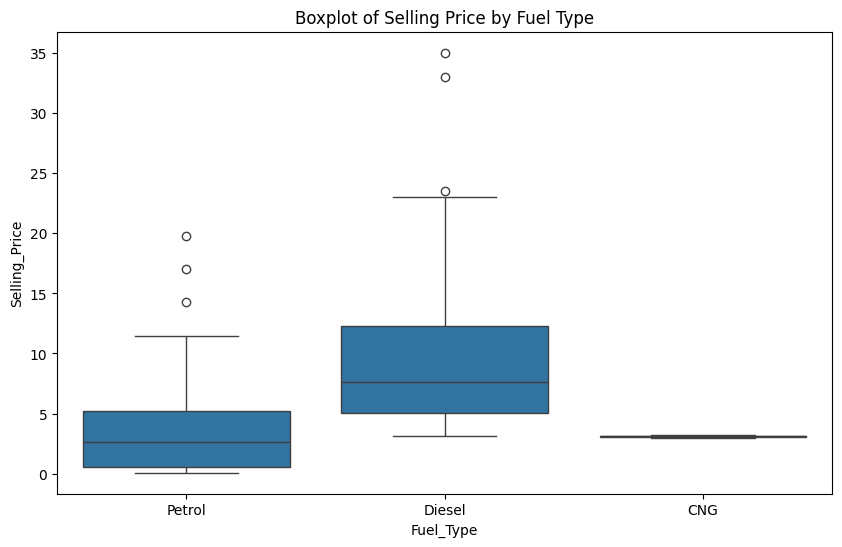

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title('Boxplot of Selling Price by Fuel Type')
plt.show()

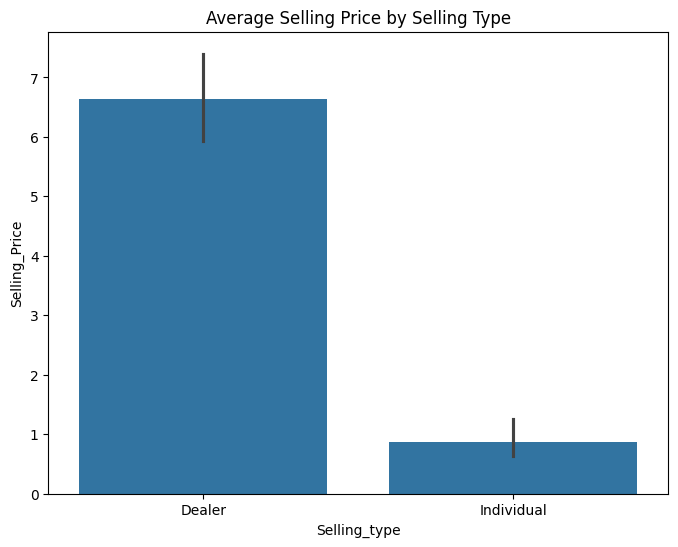

In [23]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Selling_type', y='Selling_Price', data=df)
plt.title('Average Selling Price by Selling Type')
plt.show()

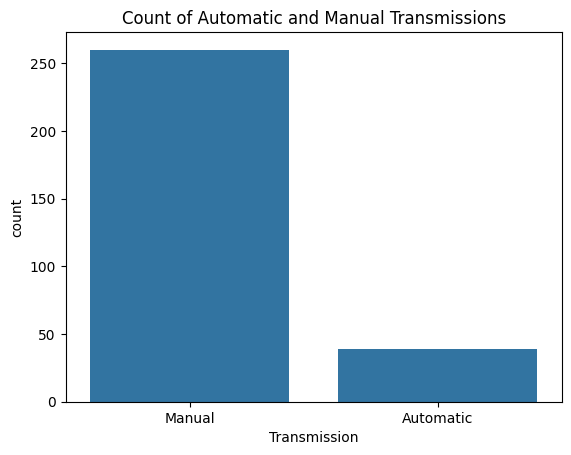

In [24]:
sns.countplot(x='Transmission', data=df)
plt.title('Count of Automatic and Manual Transmissions')
plt.show()

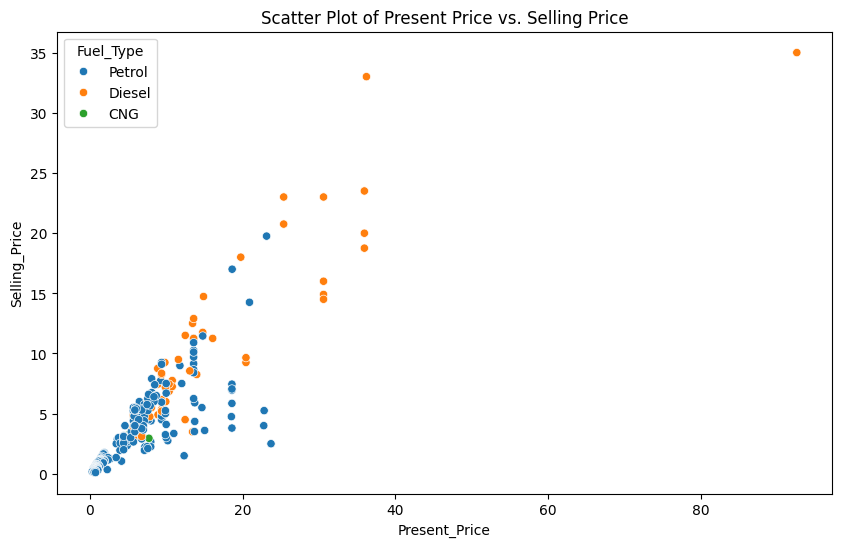

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df, hue='Fuel_Type')
plt.title('Scatter Plot of Present Price vs. Selling Price')
plt.show()

In [26]:
import plotly.express as px
import plotly.graph_objects as go

In [31]:
fig = go.Figure(data=go.Scatter3d(
    x=df['Year'],
    y=df['Present_Price'],
    z=df['Selling_Price'],
    mode='markers',
    marker=dict(
        size=8,
        color=df['Present_Price'],  
        colorscale='Viridis',  
        opacity=0.8
    )
))

fig.update_layout(
    scene=dict(xaxis_title='Year', yaxis_title='Present_Price', zaxis_title='Selling_Price'),
    title='Modified 3D Scatter Plot',
    margin=dict(l=0, r=0, b=0, t=40)  
)

fig.show()

In [32]:
fig = px.histogram(df, x='Present_Price', color='Fuel_Type', marginal='box',
                   title='Histogram of Present Price by Fuel Type')
fig.update_layout(xaxis_title='Present Price')
fig.show()

In [33]:
correlation_matrix = df.corr()
fig = px.imshow(correlation_matrix, labels=dict(color='Correlation'),
                x=correlation_matrix.index, y=correlation_matrix.columns)
fig.update_layout(title='Correlation Heatmap')
fig.show()

In [34]:
fig = px.scatter(df, x='Driven_kms', y='Selling_Price', size='Present_Price', color='Fuel_Type',
                 title='Bubble Chart for Selling Price vs. Driven KMs')
fig.update_layout(xaxis_title='Driven KMs', yaxis_title='Selling Price')
fig.show()

In [35]:
scatter_matrix = px.scatter_matrix(df, dimensions=['Selling_Price', 'Present_Price', 'Driven_kms'],
                                  color='Fuel_Type', title='Scatter Plot Matrix')
scatter_matrix.update_layout(height=600, width=600)
scatter_matrix.show()

# Data Preprocessing

In [36]:
# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'])

# Specifying x and y

In [37]:
# Select relevant features
x = df.drop(['Car_Name', 'Selling_Price'], axis=1)
y = df['Selling_Price']

In [38]:
x

,Year,Present_Price,Driven_kms,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,5.59,27000,0,0,0,1,1,0,0,1
1,2013,9.54,43000,0,0,1,0,1,0,0,1
2,2017,9.85,6900,0,0,0,1,1,0,0,1
3,2011,4.15,5200,0,0,0,1,1,0,0,1
4,2014,6.87,42450,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,0,1,0,1,0,0,1
297,2015,5.90,60000,0,0,0,1,1,0,0,1
298,2009,11.00,87934,0,0,0,1,1,0,0,1
299,2017,12.50,9000,0,0,1,0,1,0,0,1


In [39]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 299, dtype: float64

# Splitting the dataset into training and testing sets

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [41]:
print(df.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(299, 13)
(239, 11)
(60, 11)
(239,)
(60,)


# Train the Model using Linear Regression Algorithm

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
# Initialize the model
regr_model = LinearRegression()

In [44]:
regr_model.fit(x_train, y_train)

LinearRegression()

In [45]:
# Make predictions on the test set
y_pred = regr_model.predict(x_test)

In [46]:
y_pred

array([ 7.50049519,  7.791134  ,  1.36525272,  7.00895369, 11.16501084,
        4.53381705,  8.49154086,  1.69915065,  8.82263182, -0.96326043,
       10.31787191, -0.97056227,  0.72346986,  1.5342333 ,  4.97295184,
        5.04459165,  1.2926896 ,  1.85007481, 21.5644582 ,  0.86611161,
        0.92951326,  2.44919214,  5.58016408,  0.26457568,  6.26693473,
        7.82233882,  8.68146089,  1.17319762,  4.84502493,  4.91995973,
        3.26495865,  5.48547433,  6.27517695,  2.75742504,  2.90320874,
        6.96789402,  1.26301663, -4.98759108,  1.37752814, 10.38798971,
        7.10369319,  9.03962134,  1.62594283,  4.02100293,  0.97360559,
       -2.14139679,  8.14295502,  4.3744243 ,  5.65092383, -0.59580701,
        0.66085013,  0.20426306, 10.20128223,  9.4526807 ,  7.29844635,
        6.25392698,  3.71576708,  3.43085155,  9.56250205,  9.15970379])

# Checking Model Performance 

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [48]:
# Evaluate the model
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 6.373125106262182


In [49]:
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 2.524504923002168


In [50]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 1.472545750817828


In [51]:
# R-squared (R2) Score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) Score: {r2}")

R-squared (R2) Score: 0.7527233824219913


# Checking Model Predictions on New Data

In [52]:
sample_input = {
    'Year': 2015,
    'Present_Price': 8.0,
    'Driven_kms': 45000,
    'Owner': 0,
    'Fuel_Type_CNG': 0,
    'Fuel_Type_Diesel': 1,
    'Fuel_Type_Petrol': 0,
    'Selling_type_Dealer': 1,
    'Selling_type_Individual': 0,
    'Transmission_Automatic': 0,
    'Transmission_Manual': 1
}
# Convert the input dictionary to a DataFrame
sample_df = pd.DataFrame([sample_input])

# Make a prediction
predicted_price = regr_model.predict(sample_df)

# Display the predicted selling price
print(f"Predicted Selling Price: {predicted_price[0]:.2f}")

Predicted Selling Price: 6.58


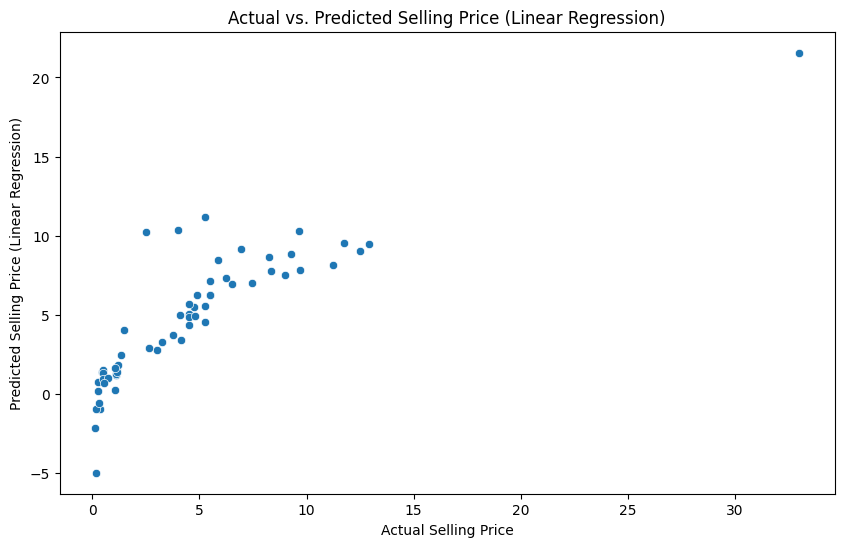

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Selling Price')
plt.ylabel('Predicted Selling Price (Linear Regression)')
plt.title('Actual vs. Predicted Selling Price (Linear Regression)')
plt.show()